In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

missing_values = ["-"]
data = pd.read_excel('Distillation_Column_data.xls', na_values = missing_values)
print("Data sample:")
data.sample(10)


Data sample:


,Date,Parameter 1,Fluid flow - input,Steam flow,Fluid flow - output,Fluid vapour flow - output,Pressure difference,Fluid temperature 1,Fluid temperature 2,Fluid temperature - input,Column temperature,Fluid vapour temperature,Fluid temperature - reboiler
149,2020-12-17 12:00:00.000,6.148790,16162.113770,1520.398682,30778.903809,289.936485,23.273023,104.771402,120.583651,61.406860,95.136185,65.661476,127.417309
763,2021-03-30 00:00:00.000,0.003160,14102.509521,1405.214752,25065.737305,281.458321,29.470104,99.589008,121.370380,58.668530,99.153696,68.450876,130.290607
547,2021-02-21 20:00:00.000,7.064332,14216.826904,1685.913361,28464.397461,279.986511,19.043775,113.069069,122.543776,67.891539,95.160505,69.615759,126.167313
2118,2021-11-11 12:00:00.000,11.510309,11186.389404,1676.106842,35990.053223,289.976059,25.062237,94.741001,121.042072,57.990031,93.357246,65.644455,125.289394
1373,2021-07-10 08:00:00.000,0.001371,15999.602295,1503.025909,32279.850586,275.184570,21.439242,102.642263,121.900532,56.843388,91.693821,59.501453,126.894449
545,2021-02-21 12:00:00.000,7.064332,13847.787109,1754.188812,29273.238770,280.207794,18.606365,111.881079,121.776503,66.985653,95.348978,68.652723,125.732002
344,2021-01-19 00:00:00.000,1.768974,15829.017334,1548.679535,24877.225586,279.956665,26.492223,105.628649,118.315907,58.089734,97.439199,66.062742,128.315899
506,2021-02-15 00:00:00.000,7.059861,14408.523193,1981.427032,34557.425781,279.732727,37.607162,103.863085,121.523586,60.524076,100.817114,68.275778,125.341679
1714,2021-09-05 04:00:00.000,5.346797,9654.350586,2148.903503,31216.555176,294.941864,37.220470,88.698929,120.973980,41.263371,100.877916,61.151506,125.707685
791,2021-04-03 16:00:00.000,0.004054,13489.378174,1646.269165,31389.017090,280.135963,26.537707,102.397860,121.553984,61.112597,102.171688,70.158075,128.987112


In [2]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          2185 non-null   object 
 1   Parameter 1                   2073 non-null   float64
 2   Fluid flow - input            2154 non-null   float64
 3   Steam flow                    2185 non-null   float64
 4   Fluid flow - output           2182 non-null   float64
 5   Fluid vapour flow - output    2185 non-null   float64
 6   Pressure difference           2185 non-null   float64
 7   Fluid temperature 1           2185 non-null   float64
 8   Fluid temperature 2           2185 non-null   float64
 9   Fluid temperature - input     2185 non-null   float64
 10  Column temperature            2185 non-null   float64
 11  Fluid vapour temperature      2185 non-null   float64
 12  Fluid temperature - reboiler  2185 non-null   float64
dtypes: 

In [3]:
# Change type of column 'Date' from object to datetime64
data['Date'] = data['Date'].astype('datetime64')

data.isna().sum()

Date                              0
Parameter 1                     112
Fluid flow - input               31
Steam flow                        0
Fluid flow - output               3
Fluid vapour flow - output        0
Pressure difference               0
Fluid temperature 1               0
Fluid temperature 2               0
Fluid temperature - input         0
Column temperature                0
Fluid vapour temperature          0
Fluid temperature - reboiler      0
dtype: int64

In [4]:
data_cleaned = data.dropna(axis=0, how='any')

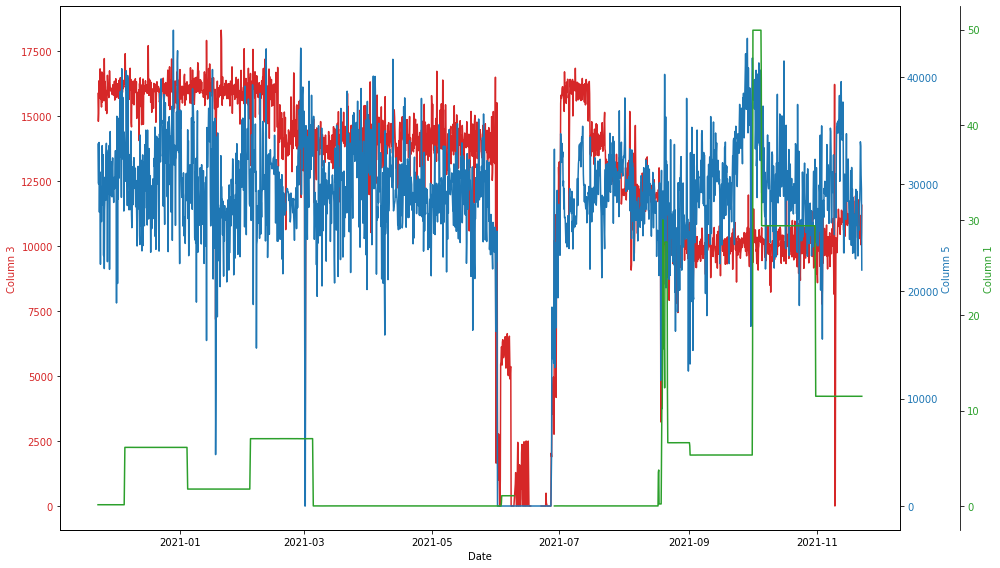

In [5]:
# Raw data plot
dates = data[data.columns[0]]
col_y1 = data[data.columns[2]]
col_y2 = data[data.columns[4]]
col_y3 = data[data.columns[1]]

fig, ax1 = plt.subplots(figsize=(14,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Column 3', color=color)
ax1.plot(dates, col_y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Column 5', color=color)  # we already handled the x-label with ax1
ax2.plot(dates, col_y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # third axis position

color = 'tab:green'
ax3.set_ylabel('Column 1', color=color)
ax3.plot(dates, col_y3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
# Remove zero values and outliers 
rows1 = data_cleaned[data_cleaned[data_cleaned.columns[2]] < 8000].index
data_cleaned = data_cleaned.drop(rows1)

rows2 = data_cleaned[data_cleaned[data_cleaned.columns[4]] < 12000].index
data_cleaned = data_cleaned.drop(rows2)

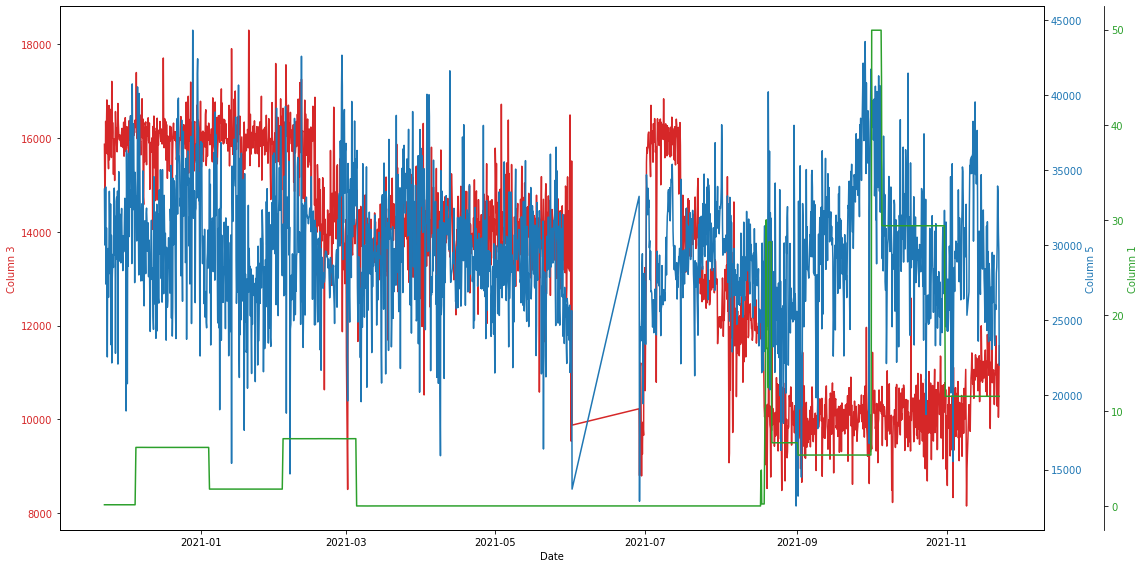

In [7]:
# Cleaned data plot
dates = data_cleaned[data_cleaned.columns[0]]
col_y1 = data_cleaned[data_cleaned.columns[2]]
col_y2 = data_cleaned[data_cleaned.columns[4]]
col_y3 = data_cleaned[data_cleaned.columns[1]]

fig, ax1 = plt.subplots(figsize=(16,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Column 3', color=color)
ax1.plot(dates, col_y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Column 5', color=color)  # we already handled the x-label with ax1
ax2.plot(dates, col_y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # third axis position

color = 'tab:green'
ax3.set_ylabel('Column 1', color=color)
ax3.plot(dates, col_y3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Parameter 1 
Minimum: -0.00
Mean: 5.82
Median: 1.77
Mode: 0.00
Maximum: 49.94

Fluid flow - input 
Minimum: 8151.62
Mean: 13350.29
Median: 13908.50
Mode: 8151.62
Maximum: 18303.33

Steam flow 
Minimum: 922.97
Mean: 1730.13
Median: 1711.57
Mode: 922.97
Maximum: 2763.01

Fluid flow - output 
Minimum: 12574.22
Mean: 29656.72
Median: 29461.15
Mode: 12574.22
Maximum: 44339.38

Fluid vapour flow - output 
Minimum: 261.15
Mean: 283.67
Median: 280.14
Mode: 280.15
Maximum: 300.71

Pressure difference 
Minimum: 17.10
Mean: 29.59
Median: 29.68
Mode: 17.10
Maximum: 49.08

Fluid temperature 1 
Minimum: 75.92
Mean: 97.79
Median: 99.60
Mode: 98.38
Maximum: 113.92

Fluid temperature 2 
Minimum: 94.92
Mean: 120.80
Median: 120.70
Mode: 121.95
Maximum: 127.94

Fluid temperature - input 
Minimum: 35.61
Mean: 52.60
Median: 57.28
Mode: 58.02
Maximum: 68.26

Column temperature 
Minimum: 76.18
Mean: 99.48
Median: 100.19
Mode: 86.84
Maximum: 112.57

Fluid vapour temperature 
Minimum: 44.68
Mean: 64.51
Median: 

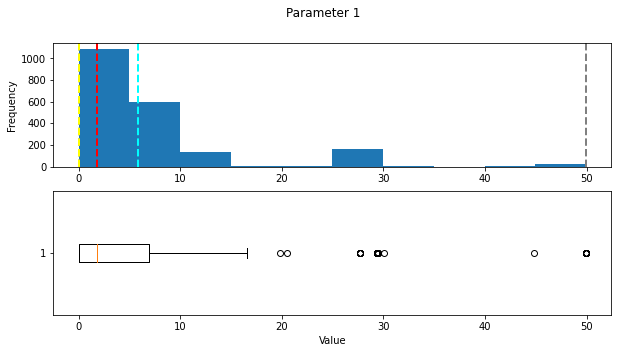

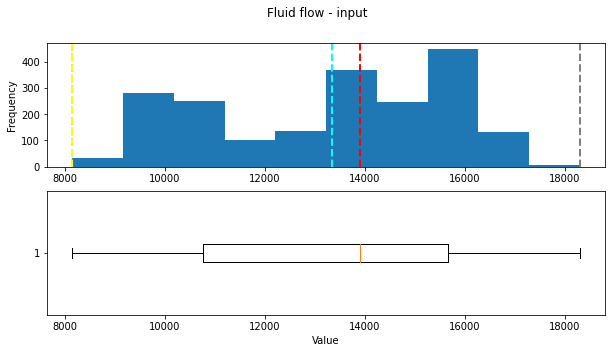

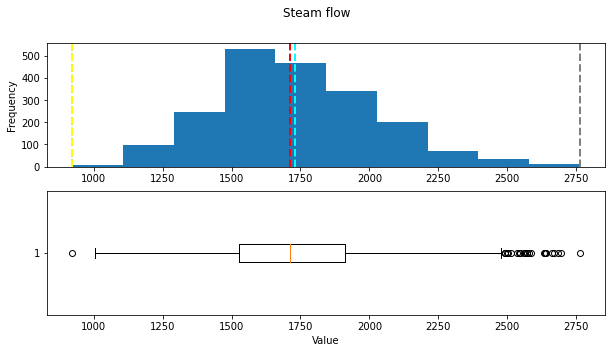

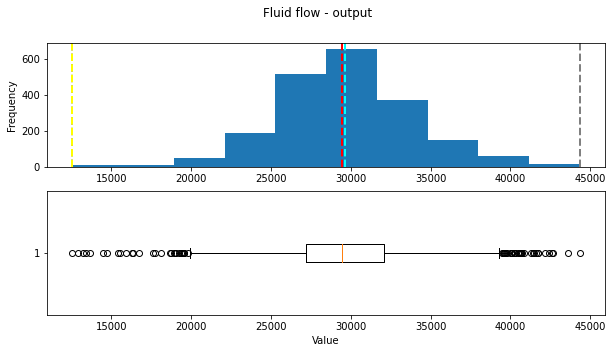

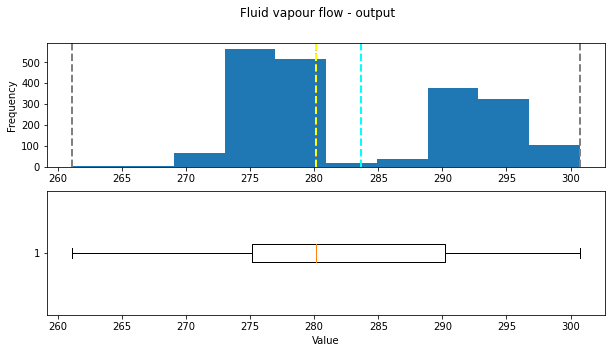

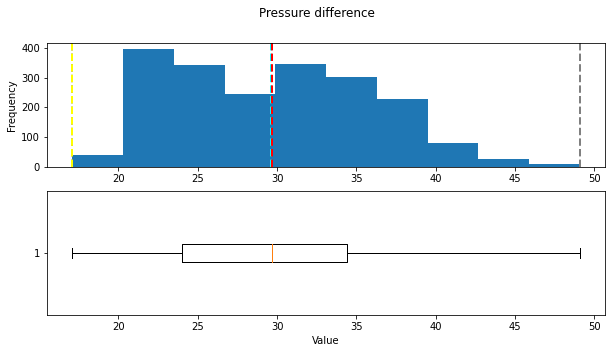

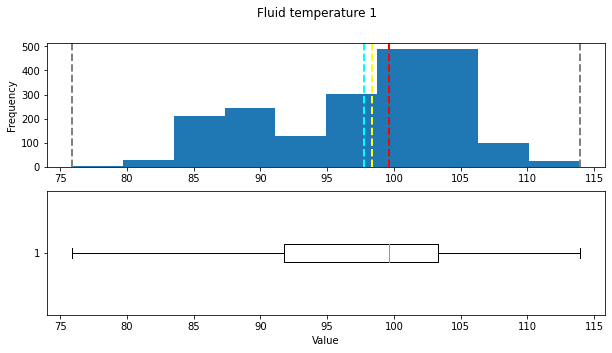

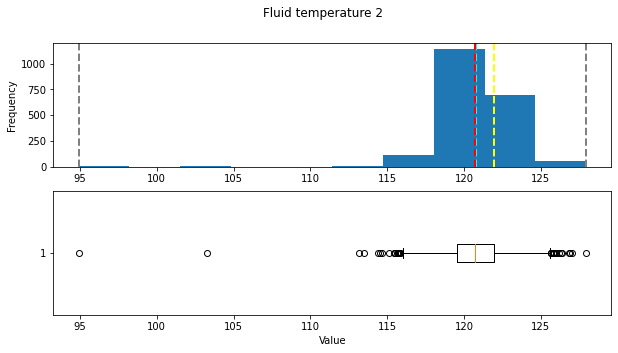

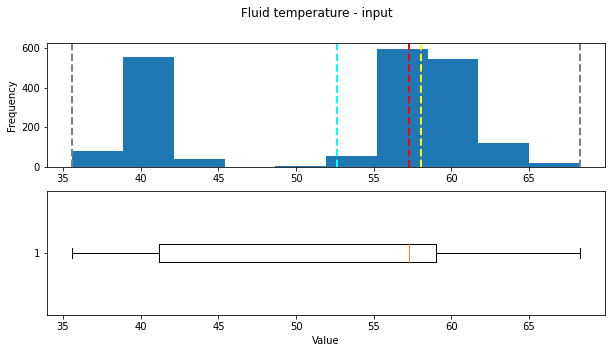

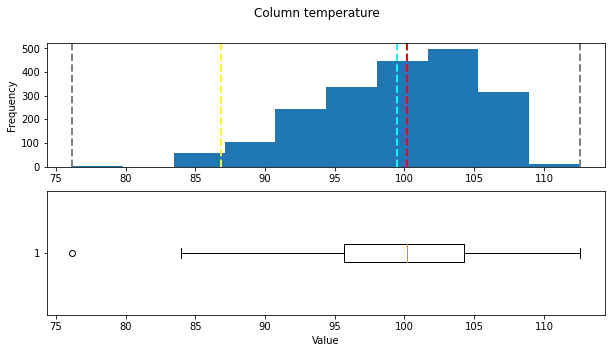

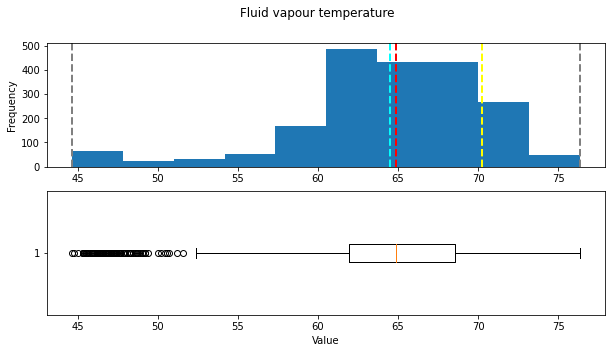

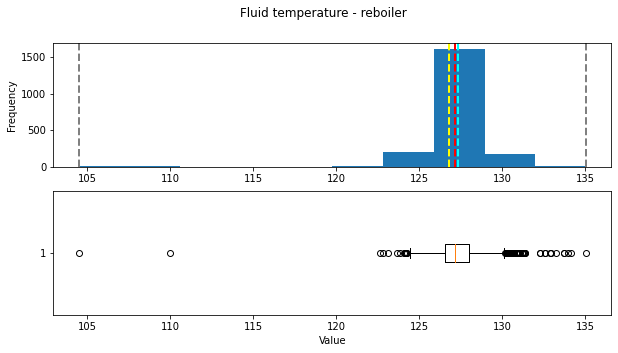

In [8]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(f"{var_data.name} \nMinimum: {min_val:.2f}\nMean: {mean_val:.2f}\nMedian: {med_val:.2f}\nMode: {mod_val:.2f}\nMaximum: {max_val:.2f}\n")
    
     # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,5))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    
    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the Figure
    fig.suptitle(var_data.name)
    
    # Show the figure
    fig
    
colToAnalyse = list(data_cleaned.columns[1:])

for col in colToAnalyse:
    show_distribution(data_cleaned[col])

Fluid vapour temperature 
Minimum: 58.04
Mean: 65.70
Median: 65.40
Mode: 70.25
Maximum: 76.34

Fluid temperature - reboiler 
Minimum: 125.00
Mean: 127.17
Median: 127.15
Mode: 125.20
Maximum: 129.12



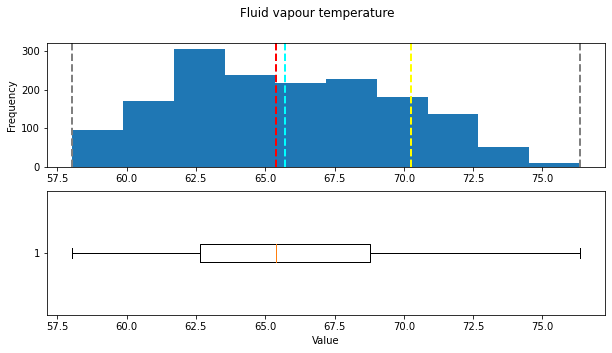

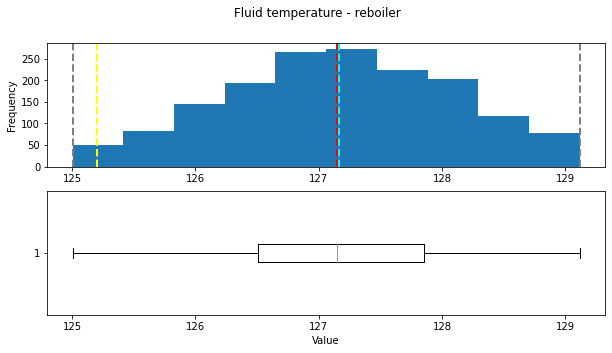

In [10]:
# Trim outliers for column 12 based on 1% and 96% percentiles
Col12_01pcntile = data_cleaned[data_cleaned.columns[12]].quantile(0.01)
Col12_96pcntile = data_cleaned[data_cleaned.columns[12]].quantile(0.96)
data_cleaned = data_cleaned[data_cleaned[data_cleaned.columns[12]] < Col12_96pcntile]
data_cleaned = data_cleaned[data_cleaned[data_cleaned.columns[12]] > Col12_01pcntile]

# Trim outliers for column 11 based on 5% and 90% percentiles
Col11_05pcntile = data_cleaned[data_cleaned.columns[11]].quantile(0.05)

data_cleaned = data_cleaned[data_cleaned[data_cleaned.columns[11]] > Col11_05pcntile]

show_distribution(data_cleaned[data_cleaned.columns[11]])
show_distribution(data_cleaned[data_cleaned.columns[12]])

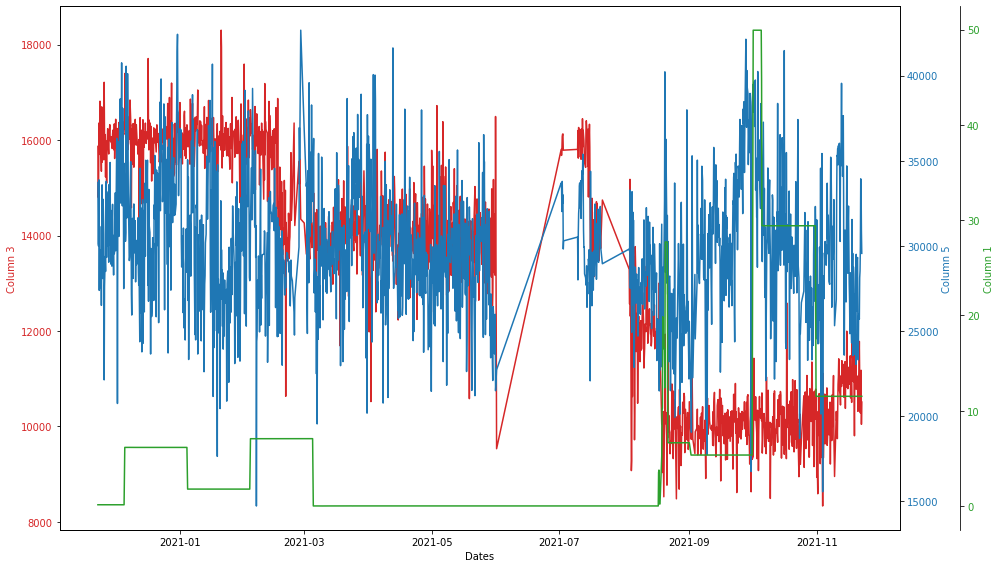

In [11]:
# Trimmed data plot
dates = data_cleaned[data_cleaned.columns[0]]
col_y1 = data_cleaned[data_cleaned.columns[2]]
col_y2 = data_cleaned[data_cleaned.columns[4]]
col_y3 = data_cleaned[data_cleaned.columns[1]]

fig, ax1 = plt.subplots(figsize=(14,8))

color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Column 3', color=color)
p1, = ax1.plot(dates, col_y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Column 5', color=color)  # we already handled the x-label with ax1
p2, = ax2.plot(dates, col_y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines['right'].set_position(('outward', 60))  # third axis position

color = 'tab:green'
ax3.set_ylabel('Column 1', color=color)
p3, = ax3.plot(dates, col_y3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [12]:
# Reset index column
data_cleaned = data_cleaned.reset_index(drop=True)

# Save cleaned and trimmed data
# data_cleaned.to_excel('Distillation Column_cleaned.xlsx')

In [13]:
# Split data for train and test
from sklearn.model_selection import train_test_split

num_columns1 = [2,3,6,7,8,9,10,12]
num_columns2 = [2,3,6,7,8,9,10,12]

# Split for model 1 - fluid output flow and model 2 - fluid vapour outlet flow
X1, y1, y2 = data_cleaned[data_cleaned.columns[num_columns1]].values, data_cleaned[data_cleaned.columns[4]].values, data_cleaned[data_cleaned.columns[5]].values
X2 = data_cleaned[data_cleaned.columns[num_columns2]].values
X_train1, X_test1, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=0)
X_train2, X_test2, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=0)

print(f"Training Set: {X_train1.shape[0]} \nTest Set: {X_test1.shape[0]}")
print(y1_train,"\n",y2_train)

Training Set: 1143 
Test Set: 491
[38157.79394531 30330.33691406 28293.7109375  ... 27789.14941406
 28238.68066406 27074.08984375] 
 [290.02758789 275.02078247 280.16495514 ... 293.89827728 280.16577911
 280.39065552]


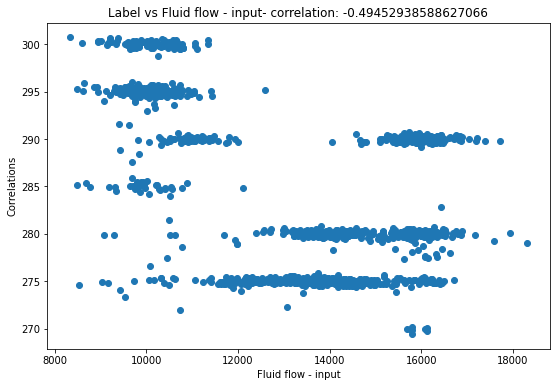

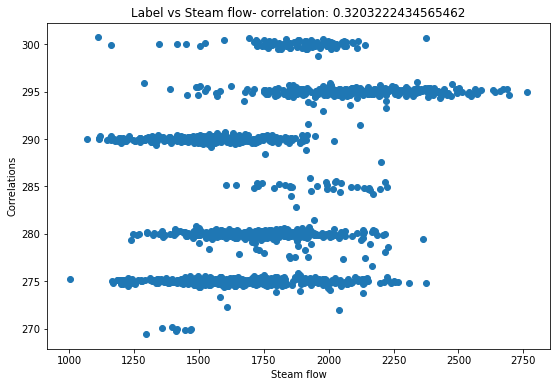

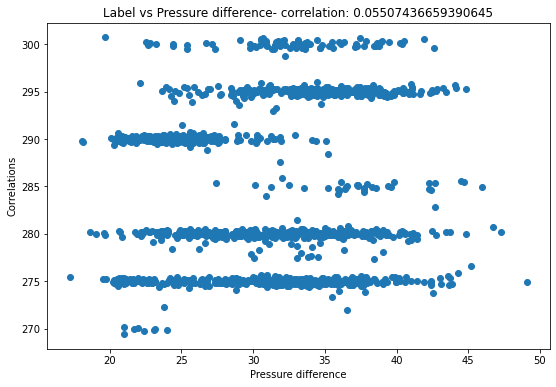

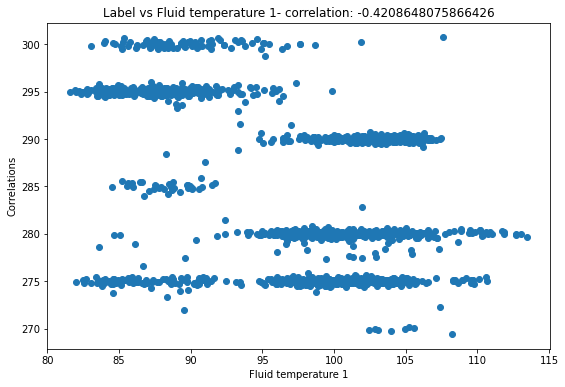

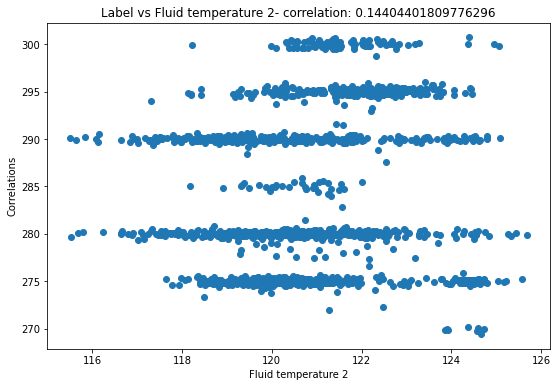

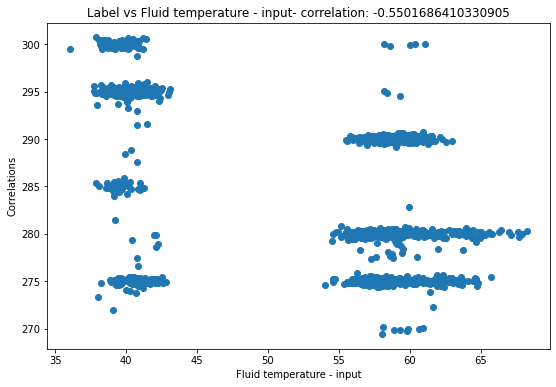

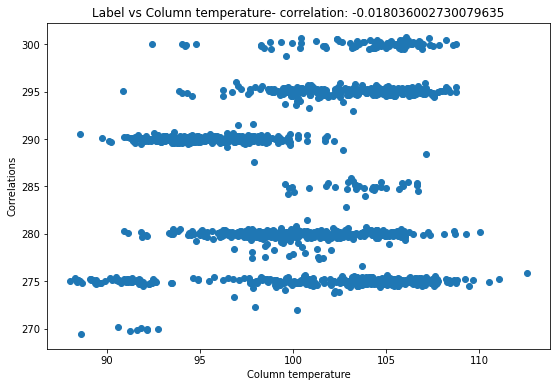

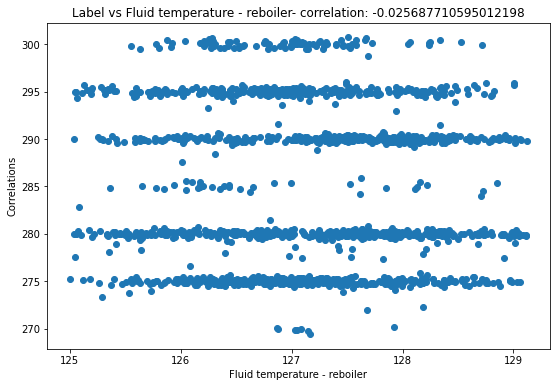

In [14]:
# Numeric correlations
label1 = data_cleaned[data_cleaned.columns[4]]
label2 = data_cleaned[data_cleaned.columns[5]]

for col in data_cleaned[data_cleaned.columns[num_columns2]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data_cleaned[col]
    correlation = feature.corr(label2)
    plt.scatter(x=feature, y=label2)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()

Preprocess the data and train a model in a pipeline

In [15]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import NuSVR
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features1 = [0,1,2,3,4,5,6,7]
numeric_features2 = [0,1,2,3,4,5,6,7]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features1)])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features2)])

# Create preprocessing and training pipeline
pipeline1 = Pipeline(steps=[('preprocessor', preprocessor1),
                           ('regressor', RandomForestRegressor(n_estimators = 3000, random_state = 0))])


pipeline2 = Pipeline(steps=[('preprocessor', preprocessor2),
                           ('RandomForest', RandomForestRegressor(n_estimators = 5000, random_state = 0))])

model1 = pipeline1.fit(X_train1, y1_train)
model2 = pipeline2.fit(X_train2, y2_train)

print(model1)
print(model2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=3000, random_state=0))])
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('RandomForest',
                 RandomForestRegressor(n_estimators=5000, random_state=0))])


MSE: 6792944.788944973 
 11.789073729719409
RMSE: 2606.327836045376 
 3.433522059011622
R2: 0.5467089107975552 
 0.8339384606995329


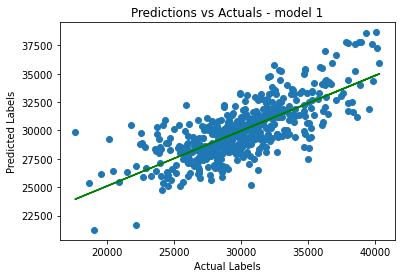

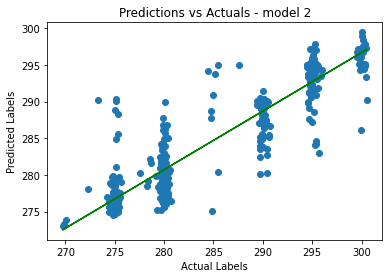

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions1 = model1.predict(X_test1)
predictions2 = model2.predict(X_test2)

# Display metrics
mse1 = mean_squared_error(y1_test, predictions1)
mse2 = mean_squared_error(y2_test, predictions2)
print("MSE:", mse1,"\n",mse2)
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
print("RMSE:", rmse1,"\n",rmse2)
r2_1 = r2_score(y1_test, predictions1)
r2_2 = r2_score(y2_test, predictions2)
print("R2:", r2_1,"\n",r2_2)

# Plot predicted vs actual
plt.scatter(y1_test, predictions1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals - model 1')
z = np.polyfit(y1_test, predictions1, 1)
p = np.poly1d(z)
plt.plot(y1_test,p(y1_test), color='green')
plt.show()

plt.scatter(y2_test, predictions2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals - model 2')
z = np.polyfit(y2_test, predictions2, 1)
p = np.poly1d(z)
plt.plot(y2_test,p(y2_test), color='green')
plt.show()

In [26]:
import math
# An array of features for testing
X_new = np.array([[15101,1518.108,22.07,104.903,119.4066,58.604,94.09533,126.9649], [10620.6272,1801.453766,38.32157421,86.92850304,119.5804996,40.62742996,103.4593887,126.8044701]])

results1 = model1.predict(X_new)
results2 = model2.predict(X_new)

real_values = [29978.282,26545.53564,289.959,294.675354]
i = 0

print('Predictions - model 1:')
for prediction in results1:
    print("Fluid output flow: ","%.2f" %prediction,"Error: ","%.2f" % float((abs(prediction-real_values[i])/real_values[i])*100),"%")
    i+=1

print("\nPredictions - model 2:")
for pred in results2:
    print("Fluid vapour outlet flow: ","%.2f" %pred,"Error: ","%.2f" % float((abs(pred-real_values[i])/real_values[i])*100),"%")
    i+=1

Predictions - model 1:
Fluid output flow:  30512.37 Error:  1.78 %
Fluid output flow:  26968.61 Error:  1.59 %

Predictions - model 2:
Fluid vapour outlet flow:  285.36 Error:  1.59 %
Fluid vapour outlet flow:  291.31 Error:  1.14 %
